<a href="https://colab.research.google.com/github/Aya-Jafar/Image-classifier/blob/main/Image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import os

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Load data from drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from IPython import display

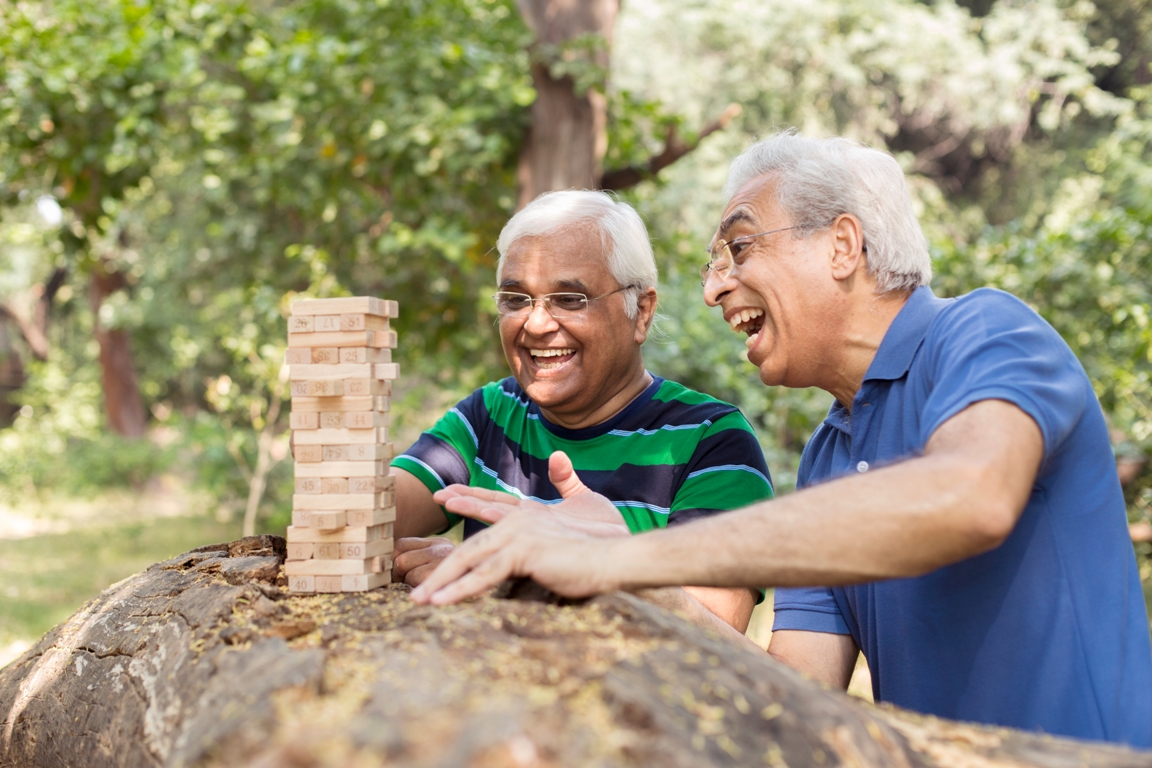

In [ ]:
display.Image("/content/gdrive/MyDrive/data/happy/10-Habits-of-Happy-People-Seniors-Today.jpg",height=150,width=150)

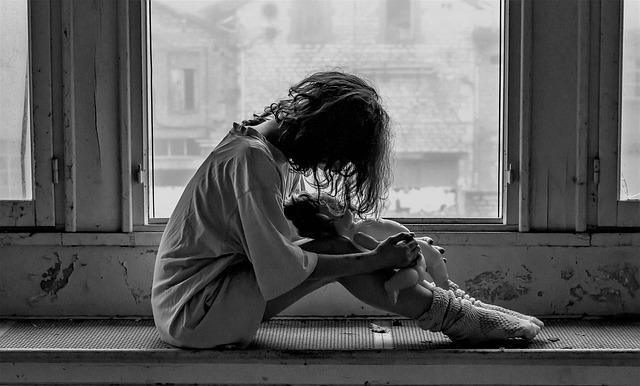

In [ ]:
display.Image("/content/gdrive/MyDrive/data/sad/sad-girl.jpg",height=150,width=150)

# Remove dodgy images

In [ ]:
import cv2
import imghdr

In [ ]:
data_dir = '/content/gdrive/MyDrive/data' 

In [ ]:
# Valid image extentions
image_exts = ['jpeg','jpg', 'bmp', 'png'] 

In [ ]:
os.listdir(data_dir) 

['happy', 'sad']

In [ ]:
os.listdir(os.path.join(data_dir, 'sad'))[:10]

['500x500.jpg',
 '46107759_800_800.jpg',
 'sad-person-concept-vector-26538685.jpg',
 'artworks-pQBql6xWFe6JFOp4-FRtE5g-t500x500.jpg',
 'isolated-girl-crying-over-makeup-sad-person-concept-isolated-white-174239618.jpg',
 'sad-group-people-problems-17033671.jpg',
 'sad-man-depression-mental-disorder-people-vector-31082153.jpg',
 'de2a0f4d137d0aeb839d43a2ea9b6c72.jpg',
 'v4-460px-Make-a-Sad-Person-Happy-Step-10.jpg',
 'black-and-white-people-girl-sad.jpg']

In [ ]:
for image_class in os.listdir(data_dir):  # iterate through classes in the main folder (happy and sad folders)
    for image in os.listdir(os.path.join(data_dir, image_class)): # iterate through each pic in the 2 subfolders
        image_path = os.path.join(data_dir, image_class, image) # join(/content/gdrive/MyDrive/data /happy/ image_name)
        try: 
            img = cv2.imread(image_path)
            ext = imghdr.what(image_path)
            if ext not in image_exts: 
                print(f'Image not in ext list {image_path}')
                os.remove(image_path)
        except Exception as e: 
            print(f'Issue with image {image_path}')

In [ ]:
print(len(os.listdir(os.path.join(data_dir, 'sad'))))
print(len(os.listdir(os.path.join(data_dir, 'happy'))))

106
104


#  Load data from dir with tensorflow

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
tf.keras.utils.image_dataset_from_directory??

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/gdrive/MyDrive/data') # splits the data into photos and their lables 

Found 210 files belonging to 2 classes.


In [ ]:
data.class_names

['happy', 'sad']

In [ ]:
os.listdir(os.path.join(data_dir, data.class_names[1]))[40]

'280-2804580_sad-people-png-sad-person-png-transparent-png.png'

In [ ]:
data_iterator = data.as_numpy_iterator() # allowing us to loop through the 'data' object using next()

In [ ]:
batch = data_iterator.next()  # return a numpy arrays of images
print(f'Min pixel value = {batch[0].min()}\nMax pixel value = {batch[0].max()}') # Values between 0-255

Min pixel value = 0.0
Max pixel value = 255.0


In [ ]:
batch[0].shape # return (number of batches , h & w after resizing , color channel)

(32, 256, 256, 3)

In [ ]:
batch[1] # return the labels 
# 1 for sad and 0 for happy

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1], dtype=int32)

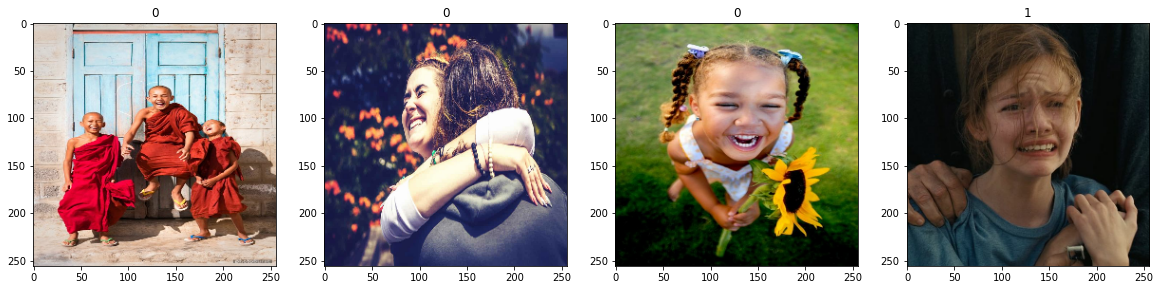

In [ ]:
# Plotting the batches 
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int)) 
    ax[idx].title.set_text(batch[1][idx])

# Data Preprocessing

### Scalling 

In [ ]:
# Make values of the images between 0-1
data = data.map(lambda x,y: (x/255, y)) # Scale X , keep Y as it is

In [ ]:
print(f'Min pixel value = {data.as_numpy_iterator().next()[0].min()}\nMax pixel value = {data.as_numpy_iterator().next()[0].max()}') 

Min pixel value = 0.0
Max pixel value = 1.0


In [ ]:
batch = data.as_numpy_iterator().next()

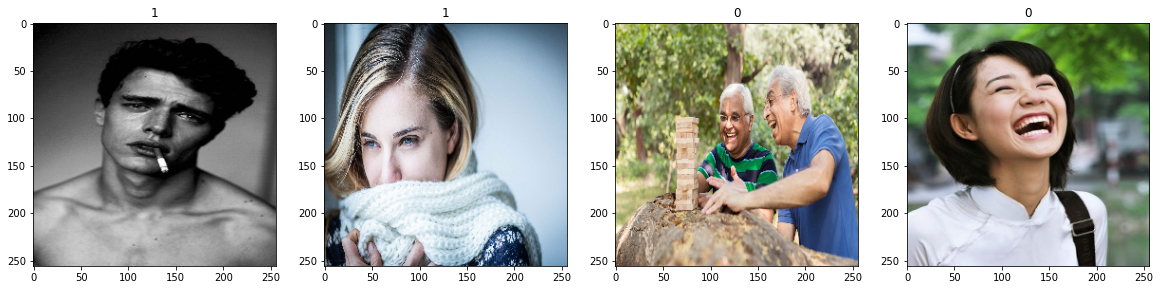

In [ ]:
# The images will still look the same after scalling
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img) 
    ax[idx].title.set_text(batch[1][idx])

###  Splitting Data

In [ ]:
len(data) # 7 images of 32 batches

7

In [ ]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.3)
test_size = int(len(data)*0.2)

In [ ]:
print('',train_size,'\n',val_size,'\n',test_size)

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
for batch in train.as_numpy_iterator(): 
  X,y = batch
print(len(X),len(y))

for batch in val.as_numpy_iterator(): 
  X,y = batch
print(len(X),len(y))

for batch in test.as_numpy_iterator(): 
  X,y = batch
print(len(X),len(y))


32 32
32 32
18 18


# Build DL Model

In [ ]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, kernel_size=(3,3), strides=1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, kernel_size=(3,3), strides=1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, kernel_size=(3,3), strides=1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

#  Train

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val)

Epoch 1/20
4/4 [==============================] - 17s 1s/step - loss: 0.8986 - accuracy: 0.4453 - val_loss: 0.6990 - val_accuracy: 0.5156
Epoch 2/20
4/4 [==============================] - 6s 1s/step - loss: 0.6769 - accuracy: 0.6172 - val_loss: 0.6271 - val_accuracy: 0.6094
Epoch 3/20
4/4 [==============================] - 8s 2s/step - loss: 0.6462 - accuracy: 0.6484 - val_loss: 0.6456 - val_accuracy: 0.7969
Epoch 4/20
4/4 [==============================] - 6s 1s/step - loss: 0.6450 - accuracy: 0.7188 - val_loss: 0.5841 - val_accuracy: 0.7969
Epoch 5/20
4/4 [==============================] - 8s 2s/step - loss: 0.5808 - accuracy: 0.7188 - val_loss: 0.5602 - val_accuracy: 0.7344
Epoch 6/20
4/4 [==============================] - 8s 2s/step - loss: 0.4992 - accuracy: 0.7812 - val_loss: 0.4668 - val_accuracy: 0.8125
Epoch 7/20
4/4 [==============================] - 8s 2s/step - loss: 0.4674 - accuracy: 0.8359 - val_loss: 0.3165 - val_accuracy: 0.8906
Epoch 8/20
4/4 [========================

#  Plot Performance

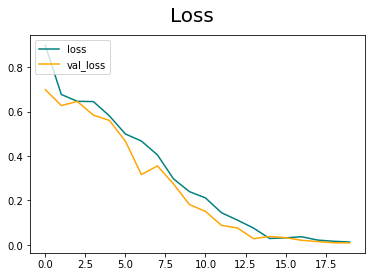

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

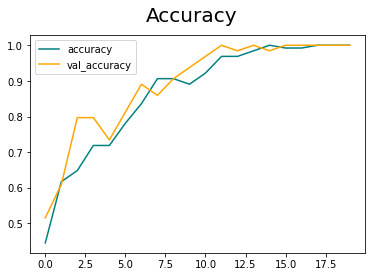

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

#  Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [ ]:
print(f'{pre.result().numpy()}\n{re.result().numpy()}\n{acc.result().numpy()}')

1.0
1.0
1.0


# Test

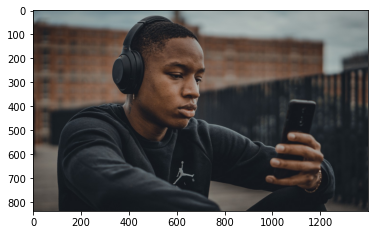

In [140]:
img = cv2.imread('/content/gdrive/MyDrive/data/test/dude.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

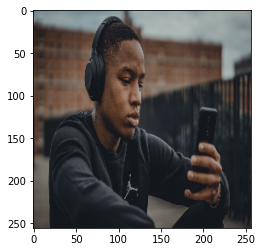

In [141]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [153]:
resize.shape

TensorShape([256, 256, 3])

In [154]:
# Make batches from the images to pass to the NN
np.expand_dims(resize/255, 0).shape

(1, 256, 256, 3)

In [146]:
result = model.predict(np.expand_dims(resize/255, 0))

In [147]:
result

array([[0.84921]], dtype=float32)

In [144]:
if result > 0.5: 
    print(f'Predicted class is Sad :(')
else:
    print(f'Predicted class is Happy :)')

Predicted class is Sad :(


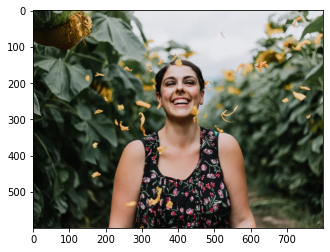

In [148]:
img = cv2.imread('/content/gdrive/MyDrive/data/test/happy.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

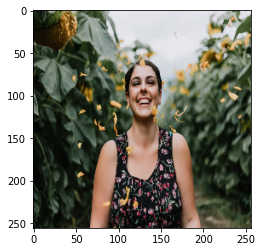

In [149]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [150]:
result = model.predict(np.expand_dims(resize/255, 0))

In [151]:
result

array([[0.01157496]], dtype=float32)

In [152]:
if result > 0.5: 
    print(f'Predicted class is Sad :(')
else:
    print(f'Predicted class is Happy :)')

Predicted class is Happy :)
